# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; and
5. Create meaningful visualizations to analyze the data!
---

## Important Dates

- Homework release: Fri 2 Oct 2020
- **Homework due**: Fri 16 Oct 2020, 23:59
- Grade release: Fri 23 Oct 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the `data` folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in either comments or markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.



## Context

The coronavirus pandemic has led to the implementation of unprecedented non-pharmaceutical interventions ranging from case isolation to national lockdowns. These interventions, along with the disease itself, have created massive shifts in people’s lives. For instance, in mid-May 2020, more than one third of the global population was under lockdown, and millions have since lost their jobs or have moved to work-from-home arrangements.


Importantly, the disease has shifted people's [needs](https://en.wikipedia.org/wiki/Toilet_paper), [interests](https://en.wikipedia.org/wiki/TikTok), and [concerns](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Switzerland) across the globe.

In this homework, we will take a deep dive into Wikipedia data and try to uncover what changed with the pandemic. More specifically, we will be focusing on Wikipedia pageviews, that is, how many people read each article on Wikipedia each day.
A nice graphical user interface for playing with Wikipedia pageviews is available [here](https://pageviews.toolforge.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&range=latest-20&pages=Cat|Dog).
Also, the Wikimedia Foundation releases dump files with the number of pageviews per article across all Wikimedia websites, including Wikipedia in all its language editions [(amazing, right?)](https://dumps.wikimedia.org/other/pagecounts-ez/). 

#### But wait, what is a pageview?

> A pageview or page view, abbreviated in business to PV and occasionally called page impression, is a request to load a single HTML file (web page) of an Internet site. On the World Wide Web, a page request would result from a web surfer clicking on a link on another page pointing to the page in question. (Source: [Wikipedia article "Pageviews"](https://en.wikipedia.org/wiki/Pageview))

Pageviews in Wikipedia can tell us that people are looking for certain information online. Analyzing how the volume and the distribution of pageviews changed can tell us about how the behavior of Wikipedia readers has changed.

In this homework, you will take a deep dive into analyzing Wikipedia pageview logs and uncover shifts in interests associated with the current pandemic.

---

## The data

First, you need to download a **meraviglioso** dataset from the Italian Wikipedia that we prepared for you. The structure of the data is described next. 

**The dataset is available in the `data` directory pushed to the same GitHub repo as the homework**. Inside of the data directory, you will find three files:

### `articles.tsv.gz`

This is a tab-separated file containing daily pageviews for a subset of the articles from Italian Wikipedia. It is compressed! Each row corresponds to a different article, and each column (except the first) corresponds to the number of pageviews this article received on a given day. The example below shows the structure for two of the things [Kristina Gligorić](https://kristinagligoric.github.io/), one of your TAs, likes the most on her Pizza:

**Example:**
~~~
index       2018-01-01 00:00:00    2018-01-02 00:00:00 (...)
Formaggio   100                    101                 (...)
Ananas      12                     54                  (...)
(...)       (...)                  (...)
~~~


### `topics.jsonl.gz`

This is a classification of which topics an article belongs to, according to a model released by the Wikimedia Foundation (the classes are derived from this [taxonomy](https://www.mediawiki.org/wiki/ORES/Articletopic)). Importantly, this file was obtained from English Wikipedia, while the previous one contains articles from the Italian Wikipedia. This is important because article titles in the Italian Wikipedia are in Italian, while article titles in the English page are in English (duh!). In any case, each line contains a .json object with
the English name of the article (name);
1. the English name of the article (`name`);
2. a set of fields related to topics themselves. Each of these fields is set as either `True` (if the article belongs to this topic) or `False` (if it does not). Notice that the same article may belong to multiple topics. 

**Example:**
~~~
{"index": "Cheese", "Culture.Food and drink": True, "Culture.Literature": False (...)}
{"index": "Pineapple", "Culture.Food and drink": True, "Culture.Literature": False (...)}
(...)
~~~

 
### `mapping.pickle`

This is a `.pickle` file, that is, a serialized Python object. You can read about Python pickles  [here](https://wiki.python.org/moin/UsingPickle), 
but in short: the default Python library `pickle` allows you to save and load Python objects to and from disk. This is one object saved via the pickle library: a Python dictionary containing a mapping between the English names and the Italian names of Wikipedia articles:

**Example:**
~~~
{
    "Cheese": "Formaggio",
    "Ananas": "Pineapple"
    (...)
}
~~~
---


## _Step 1:_ Loading the data

---
### **Task 1**

Your first task is to load all these datasets into memory using pandas and pickle. 
**You should load the files compressed.**

Here, the files at hand are rather small, and you could easily uncompress  the files to disk and work with them as plain text. 
Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, this will often not be the case.

Then, working with compressed files is key so that you don't receive e-mail from your (often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your datasets. 
Another big advantage of compressing files is to simply read files faster. You will often find that reading compressed data on the fly (uncompressing it as you go), is much faster than reading compressed data, since reading and writing to the disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

 
---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). Check the `error_bad_lines` parameter on `read_csv`.

In [1]:
### ~ 1.1

import pandas as pd
import pickle

# Loading the articles.tsv dataset
articles = pd.read_csv('data/articles.tsv.gz', compression = 'gzip', sep = '\t',
                       index_col = 'index', error_bad_lines=False)

# Loading the topics.json dataset
topics = pd.read_json('data/topics.jsonl.gz', compression = 'gzip', lines = True)
topics.set_index(keys = 'index', inplace = True)

# Loading the mapping.pickle dataset
mapping = pd.read_pickle('data/mapping.pickle')

# Note: While loading the articles.tsv dataset, we use error_bad_lines = False
# This means any erronous row (with wrong number of separators) is dropped from the dataset
# Here, we can see that line 7 has an incorrect number of columns which is why it is skipped
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

b'Skipping line 7: expected 944 fields, saw 945\n'


## _Step 2:_ Filtering the data

---
### **Task 2**

Oh no! Something seems wrong with your dataframe!
It seems that some of the lines in the `articles.tsv.gz` are weird! 
They have titles in the format `"Discussione:name_of_the_page"`.

Unsure of what they mean, you ask about them in the [Wiki-research mailing list](https://lists.wikimedia.org/mailman/listinfo/wiki-research-l).
Twenty minutes later a kind internet stranger comes with an answer! 
She tells you that these are talk pages, where people discussing what should and should not be in the article (in fact it can be pretty funny to read, eg, [you can read Italians debating about pizza](https://it.wikipedia.org/wiki/Discussione:Pizza))

After understanding what they are, your task is now to filter these lines using `pandas`! After all, we are interested in pageviews going towards articles! Not discussion pages!

---

**Hint**: There is one of them in the position \#180 of the dataframe, if you want to check it!

In [2]:
### ~ 2.1

# Calculating the number of rows in the dataset before filtering
numrows_before_filter = articles.shape[0]

# Filtering out any index which starts with 'Discussione:'
articles = articles[ [ not index.startswith('Discussione:') for index in articles.index] ] 

# Calculating the number of rows in the dataset after filtering
numrows_after_filter = articles.shape[0]
print("We have eliminated %d rows from the articles dataset which were discussion pages." 
      %(numrows_before_filter - numrows_after_filter))

We have eliminated 1000 rows from the articles dataset which were discussion pages.


## *Step 3*: Understanding the data

---
### **Task 3.1**
Data cleaning is hard huh? But now that this headache is behind us we can go on to explore our data.

Let's begin with some basic stats. It is always important to do this as a sanity check.

You should:

1. Start by calculating how many topics and articles there are. Also, while you are at it, print the names of the topics to get a grasp of what they are about. 
2. Calculate the average daily number of pageviews in the dataset.
3. **Discuss:** As previously mentioned, your data is a sample of _some_ (and not all) Wikipedia articles! Estimate (roughly) what percentage of Italian Wikipedia articles are in your dataset comparing your daily average pageview numbers with the official statistics (which can be found [here](https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2020-01-01&end=2020-09-21&sites=it.wikipedia.org)). Notice that we are focusing on the desktop version of Wikipedia.

---
**Hint**: topics are in the columns of the topic file!

In [3]:
### ~ 3.1.1

# Calculating the number of articles as the number of rows
num_articles = articles.shape[0]
# Calculating the number of topics as the number of columns
num_topics = topics.shape[1]
#
print("Number of articles = %d \nNumber of topics = %d \n"%(num_articles, num_topics))

# Creating a list of all topic names
list_topics = topics.columns.tolist()
#
print("\033[4mFollowing is the list of topics:\033[0m \n%s"%(list_topics))

Number of articles = 55791 
Number of topics = 64 

Following is the list of topics: 
['Geography.Regions.Asia.Central Asia', 'Geography.Regions.Europe.Eastern Europe', 'History and Society.Military and warfare', 'Culture.Media.Television', 'History and Society.Education', 'Culture.Media.Books', 'Geography.Regions.Africa.Africa*', 'Culture.Visual arts.Architecture', 'Culture.Biography.Women', 'Geography.Regions.Americas.North America', 'STEM.STEM*', 'Culture.Performing arts', 'Culture.Literature', 'History and Society.Politics and government', 'Geography.Regions.Africa.Northern Africa', 'STEM.Earth and environment', 'Geography.Regions.Africa.Central Africa', 'STEM.Medicine & Health', 'STEM.Libraries & Information', 'Geography.Regions.Europe.Europe*', 'Geography.Regions.Europe.Western Europe', 'Culture.Media.Radio', 'STEM.Space', 'Culture.Visual arts.Comics and Anime', 'STEM.Technology', 'Culture.Internet culture', 'Culture.Media.Software', 'Geography.Regions.Asia.East Asia', 'Geography

In [4]:
### ~ 3.1.2

# Calculating the total pageviews per day (sum of all articles pageviews per day) using sum()
# Followed by an average over all days using mean()
average_pageviews = articles.sum().mean()

print('The average daily number of pageviews is: {:.8}'.format(average_pageviews))

The average daily number of pageviews is: 324267.67


In [5]:
### ~ 3.1.3

from datetime import date

# Reference: https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2018-01-01&end=2020-07-31&sites=it.wikipedia.org
# The total pageviews on Italian desktop version of Wikipedia from 01.01.2018 to 31.07.2020 is 5405263393
wiki_pageviews = 5405263393

# Computing the number of days between the given dates, and using it to calculate the average
days = ( pd.to_datetime(articles.columns[-1]) - pd.to_datetime(articles.columns[0]) ).days +1
wiki_average_pageviews = wiki_pageviews / days

print('The average daily number of pageviews on the Italian Wikipedia is: {:.9}'.format(wiki_average_pageviews))

# Calculating the percentage of our dataset compared to the actual pageviews
dataset_wiki_percentage = average_pageviews / wiki_average_pageviews

print( "We are only considering about {:.4%} of pageviews on whole Italian Wikipedia.".format(dataset_wiki_percentage) )

The average daily number of pageviews on the Italian Wikipedia is: 5731986.63
We are only considering about 5.6572% of pageviews on whole Italian Wikipedia.



### **Task 3.2**

Now that we have a better understanding of the data, let's look at some articles to get a feeling of what is happening. 

Your task is to:

1. Find all articles whose names contain the sequence of characters `"virus"` (case insensitive) and that received least 7,000 pageviews across the entire period (no point in zooming on very insignificant articles);
2. Find a way to nicely visualize __each__ one of the time-series (in a single plot, which may have multiple panels; in the lecture, Bob referred to these as “small multiples); Your visualization should allow one to see overall trends across each of the different articles and depict the overall trends, with the least noise possible. Additionally, highlight two specific dates in your plot: 31 January ([first case reported in Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#First_confirmed_cases)) and 21 February ([when multiple cases were confirmed in northern Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#Clusters_in_northern_Italy)).
4. **Discuss**: What did you observe? Did all the articles behave similarly?

---

**Hint**: The column dates are currently strings which are not very plot friendly. You can turn them into datetime objects using: 

~~~python
your_dataframe_name.columns = pd.to_datetime(your_dataframe_name.columns)
~~~

Notice that this only works if you have only date-related columns. Fortunately, if you get rid of the `index` column by making it a real pandas index, things should work just fine.

**Hint**: Choose your axes wisely!



In [6]:
### ~ 3.2.1

# Extracting articles related to 'virus'
articles_with_virus = articles[[ 'virus' in i.lower() for i in articles.index ]]

# Filtering out pageviews with number of pageviews less than 7000
articles_with_virus = articles_with_virus[[ i >= 7000 for i in articles_with_virus.sum(axis = 1)]]

# Calculating the number of "significant" articles related to 'virus'
print("We found %d articles related to the word 'virus'" %articles_with_virus.shape[0])

We found 8 articles related to the word 'virus'


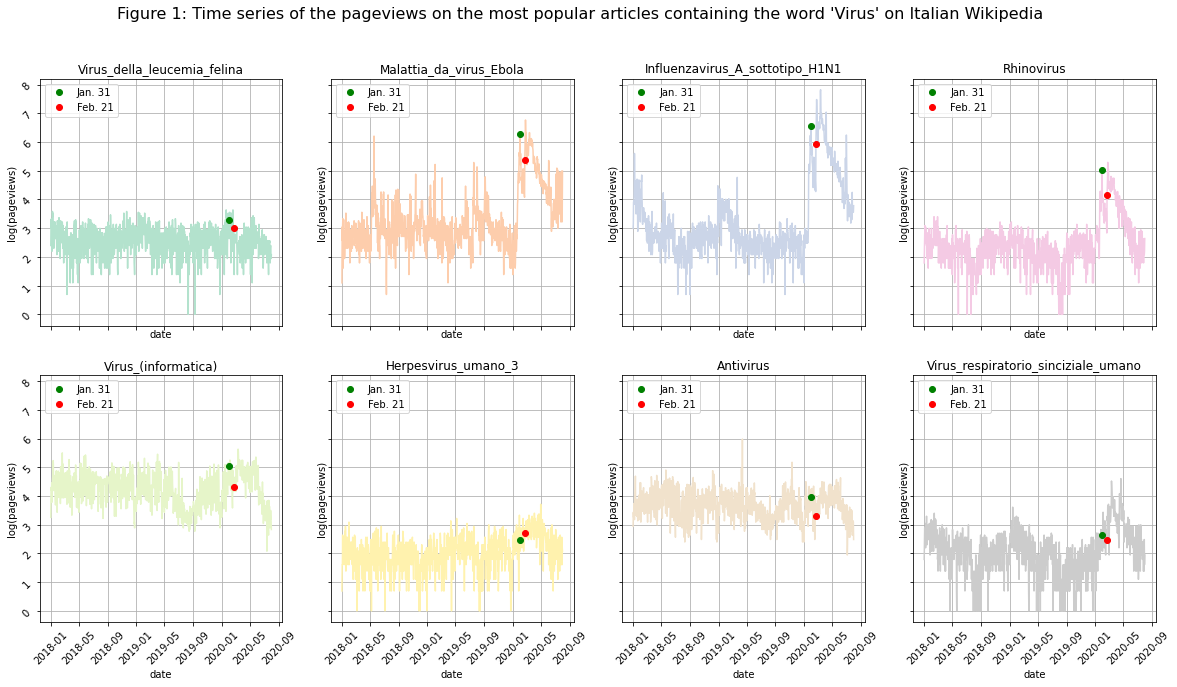

In [7]:
### ~ 3.2.2

import matplotlib.pyplot as plt
import numpy as np

# Creating 8 subplots, one for each article
fig, axs = plt.subplots(2, 4, figsize = (20, 10), sharex = True, sharey = True)
fig.suptitle('Figure 1: Time series of the pageviews on the most popular articles containing the word \'Virus\' on Italian Wikipedia', fontsize=16)

articles_with_virus.columns = pd.to_datetime(articles_with_virus.columns)

# Setting up colors for the subplots
cmap = plt.get_cmap('Pastel2') # Original choice Dark2
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

# List of dates to highlight in the plot
x = [date(2020,1,31), date(2020,2,21)]  

# Iterating for each subplot
axs = axs.ravel()

for i in range(articles_with_virus.shape[0]):
    axs[i].plot( articles_with_virus.columns, np.log(articles_with_virus.iloc[i].replace(0,1)), color = colors[i])
    # Highlighting the data for 31st Jan with a green dot, and the date for 21st Feb with a red dot
    axs[i].plot(x[0], np.log(articles_with_virus.loc[articles_with_virus.index[i],str(x[0])]),'go', label = 'Jan. 31')
    axs[i].plot(x[1], np.log(articles_with_virus.loc[articles_with_virus.index[i],str(x[1])]),'ro', label = 'Feb. 21')
    # Setting up plot parameters
    axs[i].legend(loc = 'upper left')
    axs[i].grid()
    axs[i].title.set_text(articles_with_virus.index[i])
    axs[i].set_xlabel('date')
    axs[i].set_ylabel('log(pageviews)')
    axs[i].tick_params(labelrotation=45)

In [8]:
### ~ 3.2.3

# These 8 articles belong to different topics despite being related to the word 'virus' :
    # -- 'Virus_della_leucemia_felina' is a cat virus
    # -- 'Virus_(informatica)' and 'Antivirus' are topics in Computer Science
    # -- 'Malattia_da_virus_Ebola', 'Influenza_A_sottotipo_H1N1', 'Rhinovirus','Hepesvirus_umano_3' 
    #     and 'Virus_respiratorio_sinciziale_umano' are human viruses

# We observe from Figure 1 that the daily trend of pageviews remains almost constant for all articles until January 2020
# After a closer look around the highlighted dates: 31st Jan and 21st Feb, we can say the following:
    # The trend for 'Malattia_da_virus_Ebola', 'Influenza_A_sottotipo_H1N1' and 'Rhinovirus' changes significantly. 
    # There is a clear overshoot in the number of pageviews around the highlighted dates, especially after 31st Jan.
    # Since COVID-19 became the new and alarming topic at that time, it was pretty common for people to enquire 
    # about it and other similar human viruses. This explains the sudden incease in the number of pageviews.
    # Slowly, COVID-19 becomes a common buzzword and loses 'popularity' as we can see a gradual decrease in the number of pageviews.
    #
    # The trend for 'Virus_respiratorio_sinciziale_umano' and 'Hepesvirus_umano_3' is also similarly affected.
    # But we can see that the overshoot in the number of pageviews is slighly delayed and it is relatively milder.
    # This may be because of a lower potential deadliness of these human viruses compared to previous ones we saw.
    #
    # The trend for 'Virus_della_leucemia_felina', 'Virus_(informatica)' and 'Antivirus' looks unaffected.
    # This makes sense because the cat virus and computer virus are not related to COVID-19. 


### **Task 3.3**

Before we move on, let's make a final sanity check and analyze the distribution of pageviews over all articles in our dataset. You are given a function to calculate the **cumulative distribution function** (CDF) of a sample. The CDF is a function f(x) associated with a data sample. For each value x, f(x) represents the percentage of elements in your sample that have values smaller or equal to x (read more about it [here](https://en.wikipedia.org/wiki/Empirical_distribution_function)).
Your task is to:

1. Calculate the CDF of the distribution of pageviews across all days over articles. That is, a) calculate the total number of pageviews each article has received and then, b) calculate the CDF for these values.


2. Now plot this function using different scales for the x- and y-axis. You should plot it in 4 different ways:

    a. x-axis on linear scale, y-axis on linear scale
    
    b. x-axis on log scale, y-axis on linear scale
    
    c. x-axis on linear scale, y-axis on log scale
    
    d. x-axis on log scale, y-axis on log scale
    
3. **Discuss:** There is a pretty odd fact about the distribution of our data! Can you spot it and describe it? Which of the different plots (a-d) allows you to find this oddity? Why isn't this visible in the other plots?

---

**Hint:** You can use `plt.xscale` and `plt.yscale`.

In [9]:
# This function is being given to you with a usage example :)! Make good use!

import numpy as np

def get_cdf(vals):
    # Input:
    # -- vals: an np.array of positive integers
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals);
    # -- y: an array containing the (empirically calculated) probability that vals <= x
    
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    x = list(range(1, max(vals) + 1))
    return x, y  

In [10]:
### ~ 3.3.1

# Calculating the total number of pageviews for each article (summing over days)
pageviews_sum = articles.sum(axis = 1)

# Calculating the CDF using the given function
x, y = get_cdf(np.array(pageviews_sum))

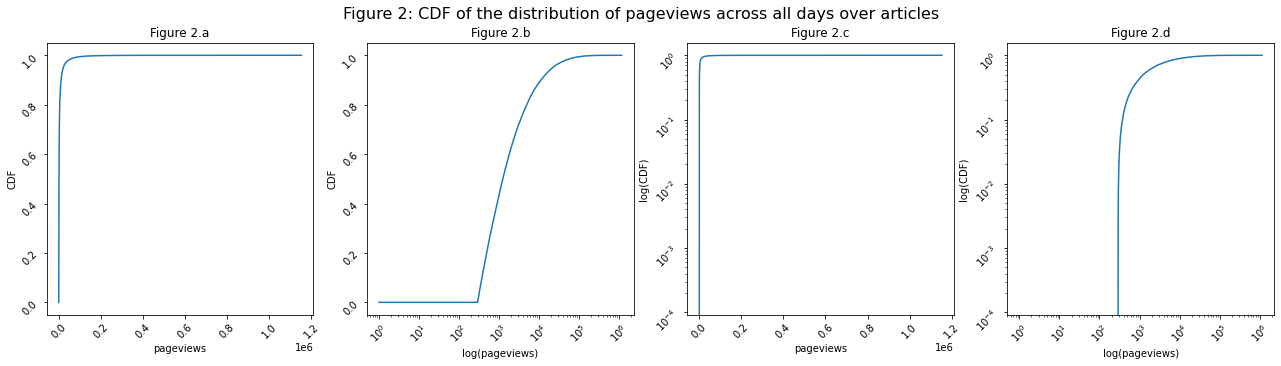

In [11]:
### ~ 3.3.2

# Creating 4 subplots for different axis scale permutations
fig, axs = plt.subplots(1,4, figsize = (22,5))
fig.suptitle('Figure 2: CDF of the distribution of pageviews across all days over articles',fontsize=16)

# Plot for linear x-axis, linear y-axis
axs[0].plot(x, y)
axs[0].tick_params(labelrotation=45)
axs[0].set_ylabel('CDF')
axs[0].set_xlabel('pageviews')
axs[0].set_title('Figure 2.a')

# Plot for logarithmic x-axis, linear y-axis
axs[1].set_xscale('log')
axs[1].tick_params(labelrotation=45)
axs[1].plot(x, y)
axs[1].set_ylabel('CDF')
axs[1].set_xlabel('log(pageviews)')
axs[1].set_title('Figure 2.b')

# Plot for linear x-axis, logarithmic y-axis
axs[2].set_yscale('log')
axs[2].tick_params(labelrotation=45)
axs[2].plot(x, y)
axs[2].set_ylabel('log(CDF)')
axs[2].set_xlabel('pageviews')
axs[2].set_title('Figure 2.c')

# Plot for logarithmic x-axis, logarithmic y-axis
axs[3].set_xscale('log')
axs[3].set_yscale('log')
axs[3].tick_params(labelrotation=45)
axs[3].plot(x, y)
axs[3].set_ylabel('log(CDF)')
axs[3].set_xlabel('log(pageviews)')
axs[3].set_title('Figure 2.d')

plt.show()

In [12]:
### ~ 3.3.3

# From Figure 2.b and 2.d we observe that on the left side the experimental CDF plotted is null before 291 pageviews and then 
# suddenly changes its slope (contrary to CDF of a Normal Distribution). 
#
# Since the total number of visits per article varies from approximately 10 ^ 2 to 10 ^ 6 (very wide range) and since this 
# phenomenon concerns only articles with few visits, we cannot perceive it from the Figure 2.a and 2.c with the linear x-axis.
# But it is clearly apparent from Figure 2.b and 2.d because of the logarithmic x-axis.
#
# We have a hypothesis that the dataset we are considering was truncated (only considers articles with more than 291 pageviews).

## *Step 4*: Analyzing Overall Pageview Volume


---
### **Task 4.1**

So far we have seen anecdotal examples. Now let’s move to the big picture! How did Wikipedia pageviews change in general? To gain a better understanding of how Wikipedia’s overall pageview volume has changed during the pandemic, you should do the following:

1. Calculate and visualize the pageviews trends across summed across **all** articles in Italian Wikipedia for the year 2020. (and only for 2020!). 
2. **Discuss**: what regular pattern (something that repeats over and over) do you see in the data?
3. Pre-process the data to remove this regular pattern and make the overall trend clearer. Repeat the plot with the processed data.

---

**Hint**: A convenient way to use `.groupby` alongside dates is to use the [`pd.Grouper`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html) class. Basically, it allows you to group by date periods given frequencies determined by the parameter `freq`. To read how to specify different types of frequencies, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). Recall that, in order to turn an index, column index -- or pretty much anything -- into a timestamp, you can use  [`pd.to_timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_timestamp.html).

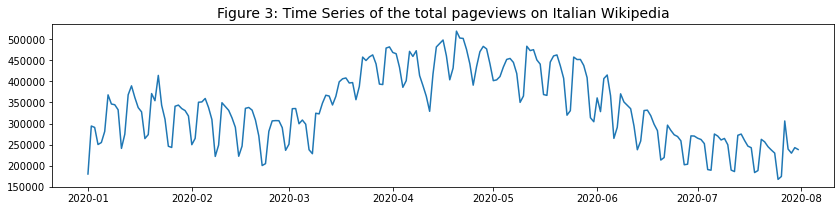

In [13]:
### ~ 4.1.1

plt.figure(figsize=(14,3))
plt.title('Figure 3: Time Series of the total pageviews on Italian Wikipedia',fontsize=14)

# Summing over all articles for each date
articles_2020 = articles.loc[:, '2020-01-01 00:00:00':]
articles_2020.columns = pd.to_datetime(articles_2020.columns)
plt.plot(articles_2020.columns.tolist(), articles_2020.sum().tolist())

plt.show()

In [14]:
### ~ 4.1.2

# The pageviews periodically increase and decrease with the frequency of approximately one week.
# We hypothesize that the pattern comes from the lower computer usage, and hence lower pageviews, in the weekend.

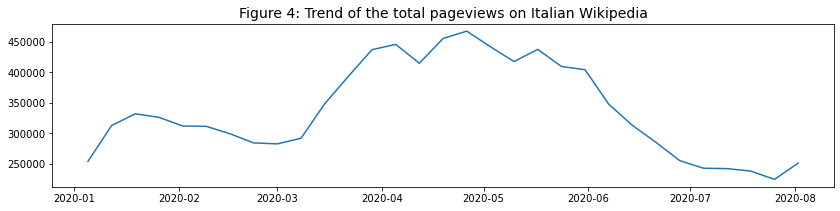

In [15]:
### ~ 4.1.3

plt.figure(figsize=(14,3))
plt.title('Figure 4: Trend of the total pageviews on Italian Wikipedia',fontsize=14)

# Transposing the data frame, and calculating mean groupby weeks
articles_2020_T = articles_2020.transpose()
articles_2020_group = articles_2020_T.groupby([pd.Grouper(freq = 'W')]).mean().sum(axis = 1)

plt.plot(articles_2020_group.index, articles_2020_group.values)
plt.show()

### **Task 4.2**

To get an even clearer picture, your task now is to compare the pageview time series of the current year (2020) with the time series of the previous year (2019).

1. Make a visualization where the two years are somehow "aligned", that is, where it is possible to compare the same time of year across the two years. Additionally, your visualization should highlight the date on which the nationwide lockdown started in Italy, 9 March 2020. Preprocess each one of the time series (for each year) the same way you did in Task 4.1.

3. **Discuss:** What changed from 2019 to 2020? Form and justify hypotheses about  the reasons behind this change.

---

**Hint**: In order to use two different y-axes in the same plot, you can use plt.twiny() or ax.twinx() (the latter if you are using the subplots environment;  [See this example](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/two_scales.html)).

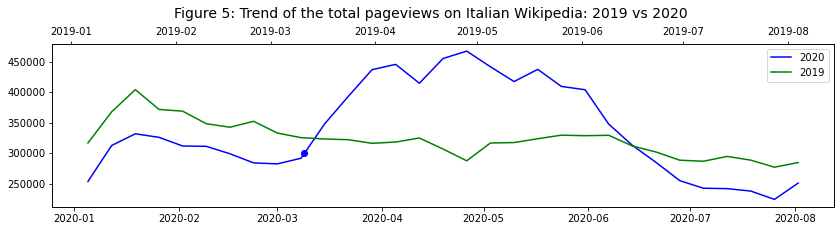

In [16]:
### ~ 4.2.1

import datetime

# Pre-processing 2019 from 2019-01-01 to 2019-07-31
articles_2019 = articles.loc[:, '2019-01-01 00:00:00':'2019-07-31 00:00:00']
articles_2019.columns = pd.to_datetime(articles_2019.columns)
articles_2019_T = articles_2019.transpose()
articles_2019_group = articles_2019_T.groupby([pd.Grouper(freq = 'W')]).mean().sum(axis = 1)

# Preparing the x index
day_2020 = [i for i in articles_2020_group.index]
day_2019 = [i for i in articles_2019_group.index]

# Defining the lockdown time point
lockdown_time = datetime.datetime.strptime('2020-03-09', '%Y-%m-%d').date()
# Since we use weekly mean to remove the regular pattern, there is no point on 2020-03-09
# Use interpolation to find the value of 2020-03-09, since we are using a weekly mean
lockdown_value = articles_2020_group['2020-03-08'].sum()*6/7+articles_2020_group['2020-03-15'].sum()*1/7

# Setting up the plot
fig = plt.figure(figsize=(14,3))
fig.suptitle('Figure 5: Trend of the total pageviews on Italian Wikipedia: 2019 vs 2020', y=1.05, fontsize=14)

ax = fig.add_subplot(111)

# Setting up plot parameters
ax.plot(day_2020, articles_2020_group.values, color = 'b', label = '2020')
ax.plot(lockdown_time, lockdown_value, 'o', color = 'b')
ax2 = plt.twiny()
ax2.plot(day_2019, articles_2019_group.values, color = 'g', label = '2019')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.show()

In [17]:
### ~ 4.2.2

# Figure 5 shows that, in normal time (before the pandemic), pageviews in 2020 are constantly lower (following the same trend)
# than the same time in 2019. However, after 2020-03-09, the number of pageviews in 2020 suddenly increases to be more than the
# number of pageviews in 2019. They return back to the pre-lockdown trend during the summer of 2020.
#
# Our hypothesis is that the italian nationwide lockdown sensibly affected the usage of the desktop version of Italian Wikipedia 
# probably because computer usage also increased during that time.

## *Step 5*: Fiddling with Topics

---
### **Task 5.1**

We now turn to a different question: what topics were impacted by the lockdown? 
To start unpacking this question, your task now is to aggregate, for each day, all pageviews that went to each one of the 64 topics. 

There are multiple ways to do this, but for the sake of this exercise, you must create a dataframe where each row contains the number of pageviews a topic obtained on a given day! Example:

~~~
index       date                   views             
TOPIC1      2019-01-01             101              
TOPIC1      2019-01-02             151             
(...)       (...)                  (...)
TOPICK      2019-01-01             1010              
TOPICK      2019-01-02             2123            
(...)       (...)                  (...)
~~~

---

**Hint**: You've should find a way to make the index in the dataframe with the topics be the same as the index in the dataframes with the articles. See the file `mapping.pickle`.

**Hint**: You may want to use `.melt`.

In [18]:
### ~ 5.1.1

# Mapping topics' index term to Italian from English
topics_index = topics.index.tolist()
topics_map_index = []
for i in topics_index:
    topics_map_index.append(mapping[i])

# Setting the index, and transposing the dataframe to align it with next dataframe
map_topics = topics.copy()
map_topics.index = topics_map_index
map_topics_T = map_topics.transpose()

# Transposing the articles pageviews to align it with the topics dataframe
articles.columns = pd.to_datetime(articles.columns)
articles_T = articles.transpose()
articles_T = articles_T[map_topics_T.columns]

# Calculating the number of views per day of each topics (using numpy)
a = map_topics_T.to_numpy().astype(int)
b = articles_T.to_numpy()

views = []
topic_col = []
date_col = []
for i in range(a.shape[0]):
    for j in range(b.shape[0]):
        topic_col.append(map_topics_T.index[i])
        date_col.append(articles_T.index[j])
        views.append(a[i].dot(b[j]))

d = {'topic': topic_col, 'date': date_col, 'views': views}
pageviews_topics_date = pd.DataFrame(d)

# Sample output
pageviews_topics_date.head(5)

,topic,date,views
0,Geography.Regions.Asia.Central Asia,2018-01-01,317
1,Geography.Regions.Asia.Central Asia,2018-01-02,465
2,Geography.Regions.Asia.Central Asia,2018-01-03,565
3,Geography.Regions.Asia.Central Asia,2018-01-04,467
4,Geography.Regions.Asia.Central Asia,2018-01-05,598


### **Task 5.2**

Now to the **grand finale**. We will consider two periods:
- the 35 days before the quarantine started (in the 9th of March); and 
- the 34 days after the quarantined started (including the day of the quarantine itself).

Create a visualization where you can compare, for each topic, the mean **number of views** in the aforementioned periods (that is, before and after the quarantine started). **Although there is a very large number of topics, your visualization should be a compact panel, small enough to fit on an A4 page.**

---

**Hint**: [Hoooray](https://seaborn.pydata.org/examples/index.html).

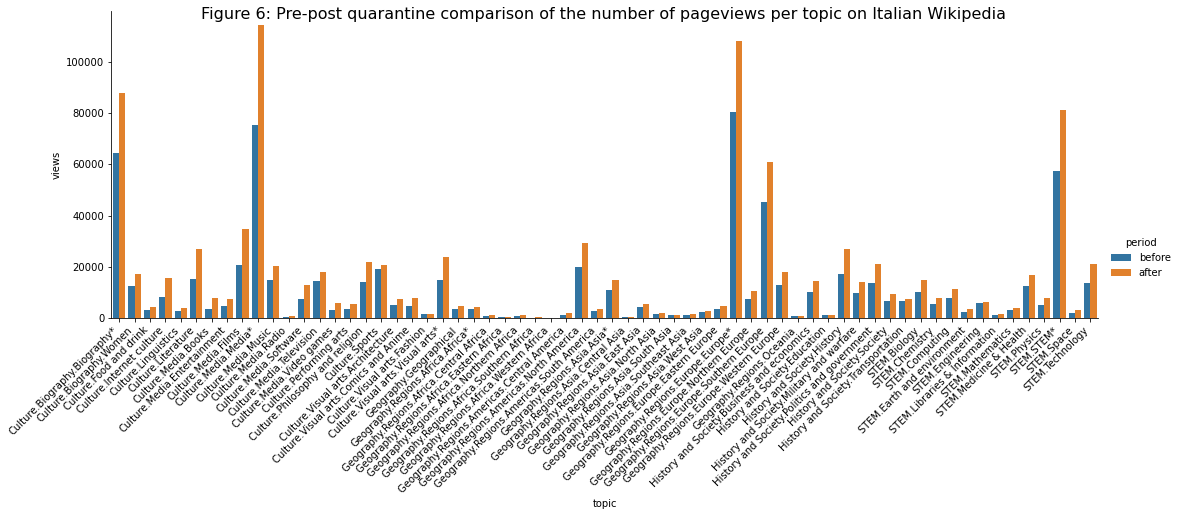

In [19]:
import seaborn as sns
### ~ 5.2

# Extracting data of 35 days before the quarantine start
before_quarantine = pageviews_topics_date[pageviews_topics_date['date'] >= np.datetime64('2020-03-09') - np.timedelta64(35, 'D')]
before_quarantine = before_quarantine[before_quarantine['date'] < np.datetime64('2020-03-09')]

# Extracting data of 34 days after the quarantine start
after_quarantine = pageviews_topics_date[pageviews_topics_date['date'] >= np.datetime64('2020-03-09')]
after_quarantine = after_quarantine[after_quarantine['date'] < np.datetime64('2020-03-09') + np.timedelta64(35, 'D')]

# Calculating the mean of two periods, grouping by topic
before_stats = before_quarantine.groupby('topic')['views'].mean()
after_stats = after_quarantine.groupby('topic')['views'].mean()

# Calculating the mean of the pageviews during each period
before_mean = before_quarantine.groupby(before_quarantine['topic'])['views'].mean().to_frame()
after_mean = after_quarantine.groupby(after_quarantine['topic'])['views'].mean().to_frame()

# Adding the period column
before_mean['period'] = 'before'
after_mean['period'] = 'after'

# Combining before and after dataframes for the plot
combine_before_after = pd.concat([before_mean, after_mean])
combine_before_after.reset_index(inplace = True)

# For reference
#print(combine_before_after)

# Plotting
chart = sns.catplot(x = 'topic',       
            y = 'views',     
            hue = 'period',      
            data = combine_before_after,
            kind = "bar",
            height = 5,
            aspect = 3,
            )

chart.fig.suptitle('Figure 6: Pre-post quarantine comparison of the number of pageviews per topic on Italian Wikipedia',fontsize=16)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

plt.show()

### **Task 5.3**

Notice that the previous analysis fails to isolate the increases or decreases in each individual topic from the overall increases or decreases in pageviews across Wikipedia in general. That is, it could be that all topics gained/lost pageviews, but some did so more than articles in general, while others did so less than articles in general. To address this issue, you should:


1. Normalize the pageviews counts in the dataframe created in Task 5.1. Instead of using the raw number of pageviews, you should compute, for each day, what fraction of all pageviews a topic received.

2. Create a second visualization that shows not the **raw** value of pageviews before and after, but the **relative** value that you just calculated.

3. **Discuss:** According to Task 5.2, what topics have increased in terms of the raw, absolute number of pageviews after the quarantine started? In relative, rather than absolute, terms, do these findings still hold? If not, what has changed?

---

In [20]:
### ~ 5.3.1

# Adding a new column with the pageviews per date
pageviews_date = pageviews_topics_date.groupby('date').sum()
pageviews_date_perc = pd.merge(pageviews_topics_date, pageviews_date, on='date')

# Computing the fraction of pageviews
pageviews_date_perc['views_perc'] = pageviews_date_perc['views_x'] / pageviews_date_perc['views_y']

# Deleting the old features
pageviews_date_perc.drop(columns=['views_x','views_y'], inplace=True)

pageviews_date_perc.head(5)

,topic,date,views_perc
0,Geography.Regions.Asia.Central Asia,2018-01-01,0.000556
1,Geography.Regions.Europe.Eastern Europe,2018-01-01,0.004412
2,History and Society.Military and warfare,2018-01-01,0.012490
3,Culture.Media.Television,2018-01-01,0.028128
4,History and Society.Education,2018-01-01,0.000899


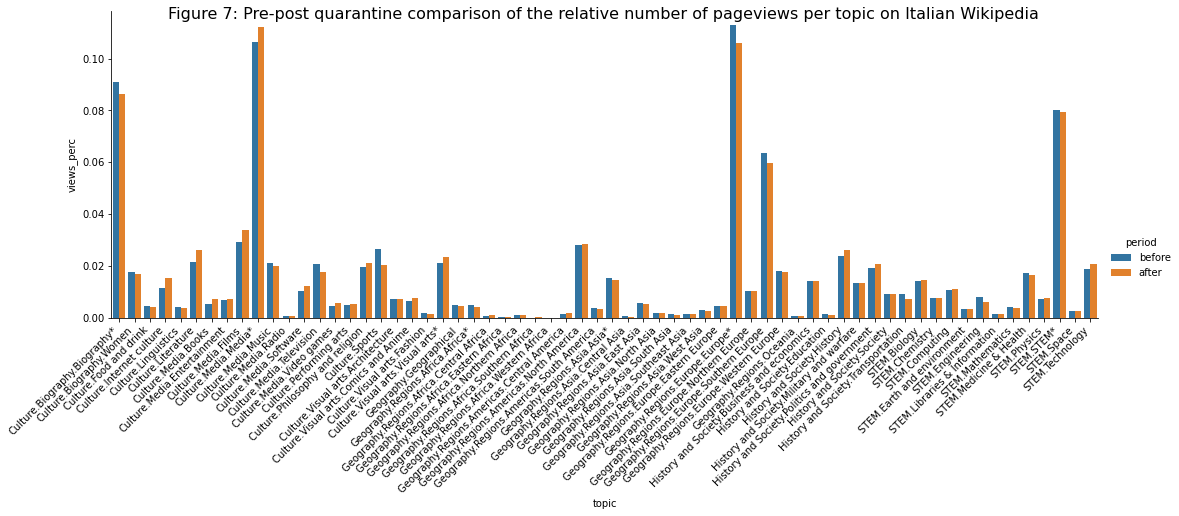

In [21]:
### ~ 5.3.2

# Extracting the data of 35 days before the quarantine start
before_quarantine = pageviews_date_perc[pageviews_date_perc['date'] >= np.datetime64('2020-03-09') - np.timedelta64(35, 'D')]
before_quarantine = before_quarantine[before_quarantine['date'] < np.datetime64('2020-03-09')]

# Extracting the data of 34 days after the quarantine start
after_quarantine = pageviews_date_perc[pageviews_date_perc['date'] >= np.datetime64('2020-03-09')]
after_quarantine = after_quarantine[after_quarantine['date'] < np.datetime64('2020-03-09') + np.timedelta64(35, 'D')]

# Calculating the mean of two periods grouping by topic
before_stats = before_quarantine.groupby('topic')['views_perc'].mean()
after_stats = after_quarantine.groupby('topic')['views_perc'].mean()

# Calculating the mean of the pageviews during each period
before_mean = before_quarantine.groupby(before_quarantine['topic'])['views_perc'].mean().to_frame()
after_mean = after_quarantine.groupby(after_quarantine['topic'])['views_perc'].mean().to_frame()

# Adding the period column
before_mean['period'] = 'before'
after_mean['period'] = 'after'

# Combining before and after quarantine dataframes for the plot
combine_before_after = pd.concat([before_mean, after_mean])
combine_before_after.reset_index(inplace = True)

# For reference
#print(combine_before_after)

# Plotting
chart = sns.catplot(x = 'topic', 
            y = 'views_perc',   
            hue = 'period', 
            data = combine_before_after,
            kind = "bar",
            height = 5,
            aspect = 3,)

chart.fig.suptitle('Figure 7: Pre-post quarantine comparison of the relative number of pageviews per topic on Italian Wikipedia',fontsize=16)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

plt.show()

In [22]:
### ~ 5.3.3

# Figure 6 shows that, in terms of raw data, almost all topics have seen a significant increase in the number of pageviews
# after quarantine, and none considerably declined. This increase is more evident in the most popular topics like 
# "Culture.Biography.Biography", "Culture.Media.Media", "Geography.Region.Europe.Southern Europe", "STEM:STEM" and
# "Geography.Region.Europe.Europe".

# However, when looking at the relative values in Figure 7, it is visible that not all topics increased their relative
# importance during the quarantine (it surely looks impossible). Some topics increased their relative importance and others 
# decreased or stayed almost the same, even if they increased the absolute number of pageviwes.
# For instance, "Geography.Region.Europe.Europe" is a popular topic that considerably increased the total number of pageviews 
# during the quarantine, despite having decreased its relative importance compared to other topics.

# The Figure 6 doesn't give any relative information about the topics importance, because of the overall increase in the number
# of articles read.  Hence it appeared like all the topics became "trending" after the quarantine, but when we compare 
# the relative number of pageviews through Figure 7, we can clearly see which ones truly gained more "popularity".